In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
customers.head(5)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
products.head(5)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
transactions.head(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [9]:

products.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [10]:
transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [13]:
customers.describe()
products.describe()
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [14]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [15]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [16]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

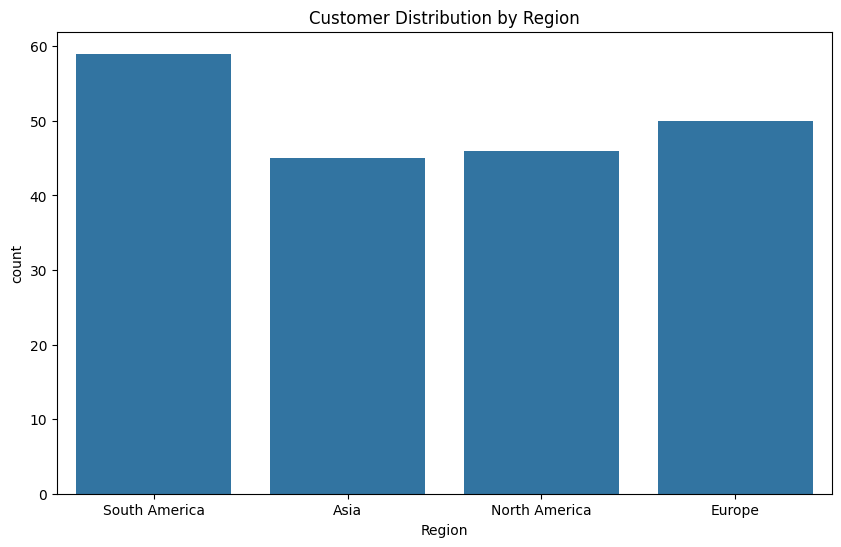

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

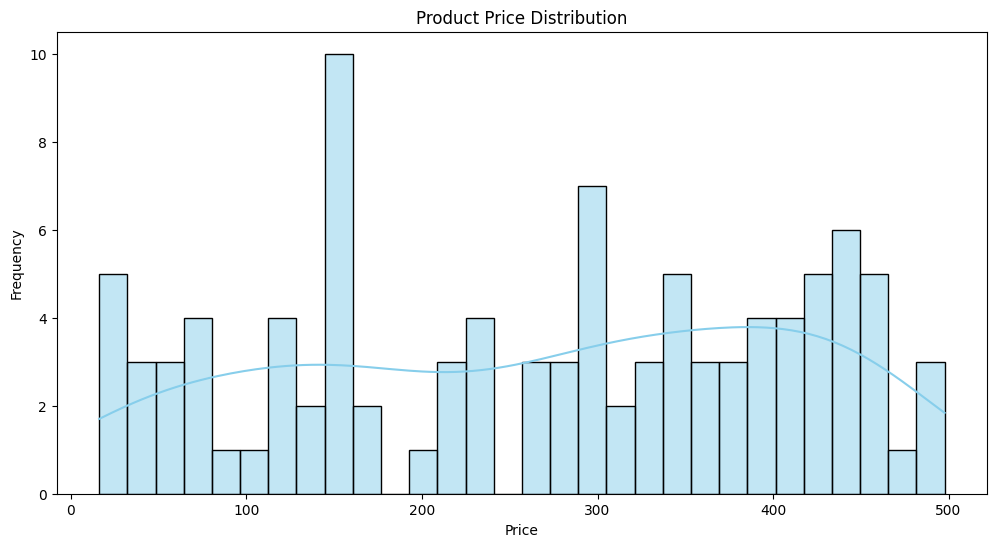

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(products['Price'], bins=30, kde=True, color='skyblue')
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


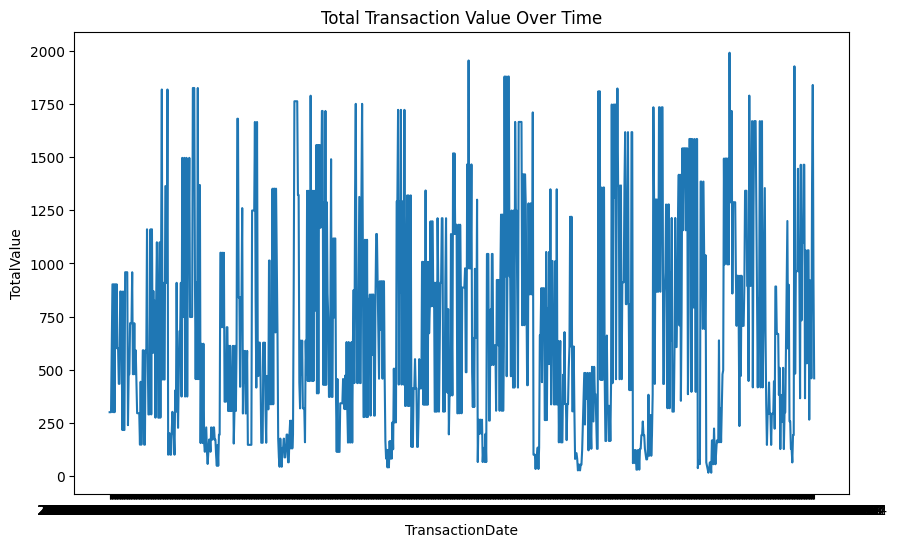

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(data=transactions, x='TransactionDate', y='TotalValue')
plt.title('Total Transaction Value Over Time')
plt.show()

In [20]:
customer_purchases = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print(customer_purchases.head(10))


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [21]:
product_sales = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
print(product_sales.head(10))


ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


1. The bulk of customers are based in South America, implying that marketing efforts towards that region may have the high return through engagement.

2. Sales volume is contributed by a few products mostly hence a concentration on them may probably boost revenue.

3. Customers who have been longer with the company spend more thus this means that customer retention strategies should feature prominently.

4. Sales are seasonal, with high sales in specific months, implying that promotions should coincide with these peak demand periods.

5. Most of the sales have small quantities, meaning there is potential for upselling or bundling to increase order size.